# Introduction to TDA
first steps in creating code for project...

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## Example 1: Clustering Algorithms

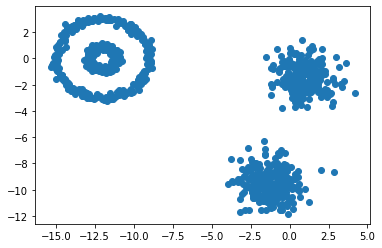

In [25]:
# Import packages for creating toy datasets and plotting
from sklearn.datasets import make_circles
from sklearn.datasets import make_blobs

# create datasets
X1, y1 = make_circles(n_samples=500, noise=0.05, factor=0.3, random_state = 3)
X2, y2 = make_blobs(n_samples=500, centers=2, center_box = (-10,10), random_state=2)

# combine the toy dataset.
X = np.concatenate((3*X1-np.array([[12,0]]),X2),axis=0)

# plot 
plt.scatter(X[:,0],X[:,1]);

## $k$-means clustering
One of the most basic clustering algorithms is $k$-Means Clustering. The function is included in scikit-learn. To run $k$-Means, one must choose $k$. This is a nontrivial task in unsupervised learning, where ground truth labels are not known.

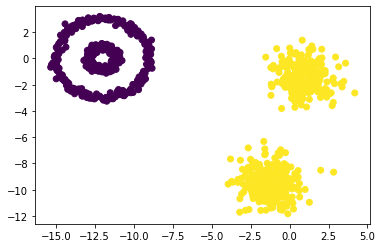

In [32]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2).fit(X) 
# Choose 2 clusters to start
# It's pretty clear that this is not the correct choice
plt.scatter(X[:,0],X[:,1],c = kmeans.labels_);


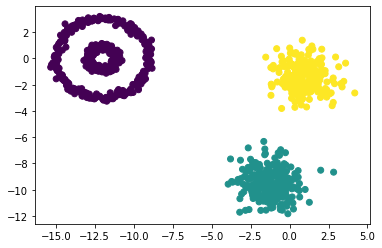

In [33]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3).fit(X) 
# 3 clusters gives something reasonable
# Still not correct

plt.scatter(X[:,0],X[:,1],c = kmeans.labels_);

No matter how many clusters we choose, $k$-Means will not be able to separate the concentric circles---the means of the circles are the same, so there is no hope!


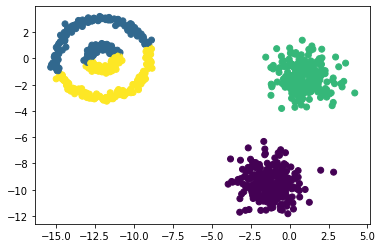

In [34]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4).fit(X) 
# 3 clusters gives something reasonable
# Still not correct

plt.scatter(X[:,0],X[:,1],c = kmeans.labels_);

## Example 2: Computing Persistence Diagrams
The main topological feature that is used in TDA is called a persistence diagram. In this example we compute persistence diagrams for several point clouds. We will use specialized Python packages for TDA called ripser and persim.

In [35]:
# Import packages
from ripser import ripser
# ripser is a package for computing barcodes from Vietoris-Rips complexes
from persim import plot_diagrams 
# persim is a package for displaying and computing distances between persistence diagrams



## random point cloud
define a toy data set

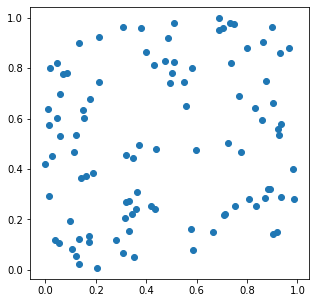

In [36]:
data = np.random.random((100,2)) # Define a random point cloud of 100 points in the plane
fig = plt.figure(figsize=(5,5)) # Create a figure to display the random point cloud
ax = fig.add_subplot(111)
ax.scatter(data[:, 0], data[:, 1]) # Plot the data on the axes. +b plots as a scatter plot of blue + signs.
ax.axis('equal'); # Set the aspect ratio to use equal axis scales.


In [51]:
ripserData = ripser(data)

In [53]:
ripserData.keys()

dict_keys(['dgms', 'cocycles', 'num_edges', 'dperm2all', 'idx_perm', 'r_cover'])

In [54]:
diagrams = ripser(data, maxdim=2)['dgms']
print(diagrams)

[array([[0.        , 0.00755962],
       [0.        , 0.01050967],
       [0.        , 0.01269402],
       [0.        , 0.01563084],
       [0.        , 0.01701894],
       [0.        , 0.01893969],
       [0.        , 0.01955045],
       [0.        , 0.02043761],
       [0.        , 0.02135471],
       [0.        , 0.02335881],
       [0.        , 0.02362473],
       [0.        , 0.02400818],
       [0.        , 0.02489473],
       [0.        , 0.02587047],
       [0.        , 0.03097327],
       [0.        , 0.0309805 ],
       [0.        , 0.03138417],
       [0.        , 0.03158876],
       [0.        , 0.03203554],
       [0.        , 0.03204089],
       [0.        , 0.03279102],
       [0.        , 0.03449323],
       [0.        , 0.03691196],
       [0.        , 0.03857928],
       [0.        , 0.03902025],
       [0.        , 0.03964321],
       [0.        , 0.03984475],
       [0.        , 0.04197507],
       [0.        , 0.04296992],
       [0.        , 0.0430816 ],
       [0

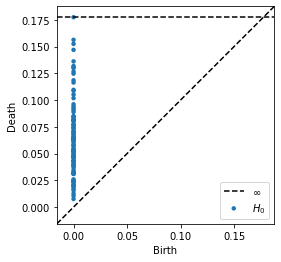

In [55]:
plot_diagrams(diagrams[0]) # Just degree-0

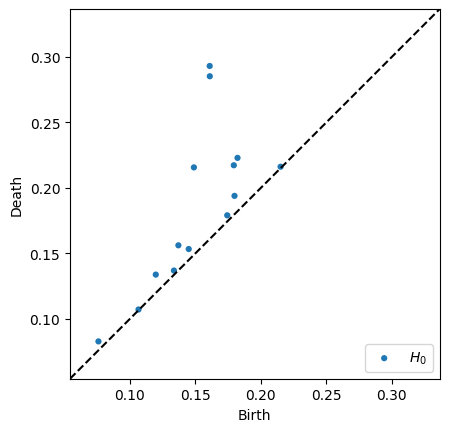

In [56]:
plot_diagrams(diagrams[1]) # Just degree-1

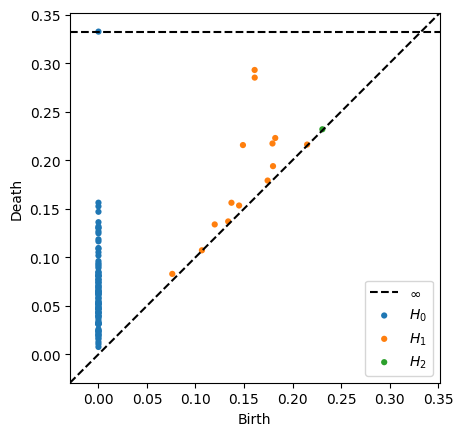

In [57]:
plot_diagrams(diagrams) # Both degree-0 and degree-1

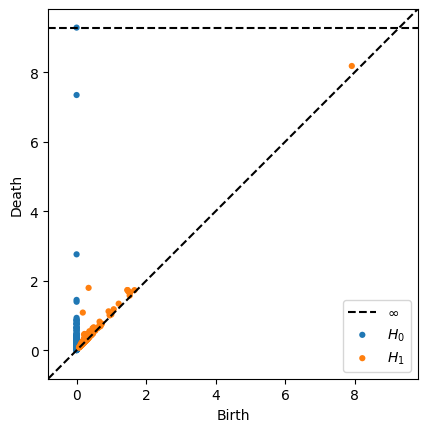

In [58]:
diagrams = ripser(X)['dgms']
plot_diagrams(diagrams)


# Spheres
Let's examine the persistent homology of point clouds on spheres. First we define a function to randomly sample from Euclidean spheres. Then we sample 250 points from a sphere in 3-space and plot the result.

In [59]:
# Define a function to sample randomly from a sphere
def sample_spherical(npoints, ndim=3):
    sample = np.random.randn(ndim, npoints)
    sample /= np.linalg.norm(sample, axis=0)
    sample = sample.T
    return sample

# Randomly sample from a sphere with added noise
def noisy_sample_spherical(npoints, ndim, noise_level = 0.01):
    sphere = sample_spherical(npoints, ndim)
    noise = np.random.multivariate_normal(ndim*[0], noise_level*np.eye(ndim), npoints)
    sample = sphere + noise
    return sample

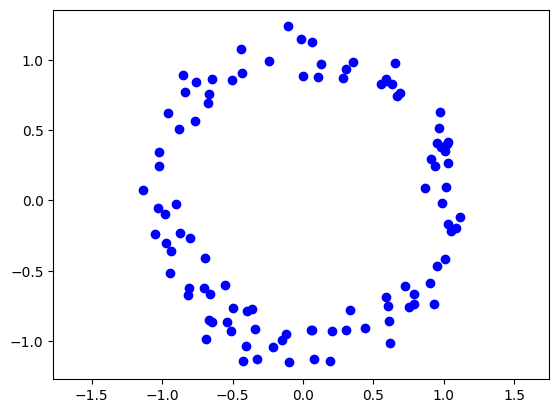

In [60]:
data = noisy_sample_spherical(100,2)
# Generate the noisy circle.

# Plot the data as a scatter plot.
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(data[:, 0], data[:, 1], 'ob', label='Source samples');
ax1.axis('equal');

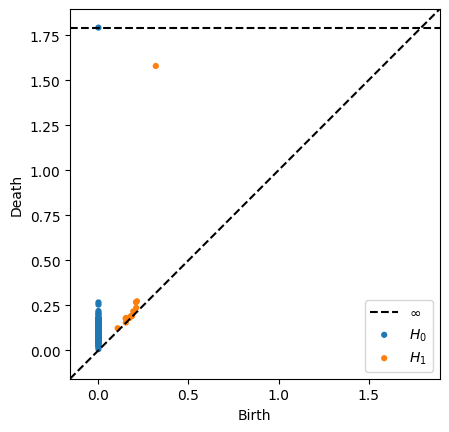

In [62]:
dgms = ripser(data)['dgms']
plot_diagrams(dgms, show=True)

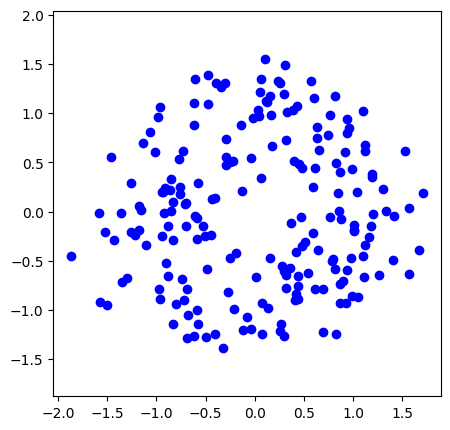

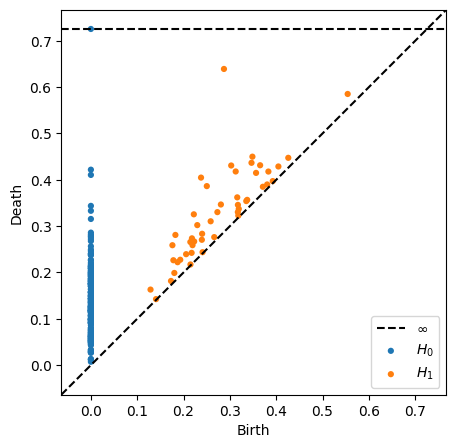

In [63]:
numsamp = 200
noise = .1

data = noisy_sample_spherical(numsamp,ndim=2,noise_level=noise)

fig = plt.figure(figsize=(5,5))
ax1 = fig.add_subplot(111)
ax1.plot(data[:, 0], data[:, 1], 'ob');
ax1.axis('equal')
dgms = ripser(data)['dgms']
fig2 = plt.figure(figsize=(5,5))
plot_diagrams(dgms, show=True)


NotImplementedError: It is not currently possible to manually set the aspect on 3D axes

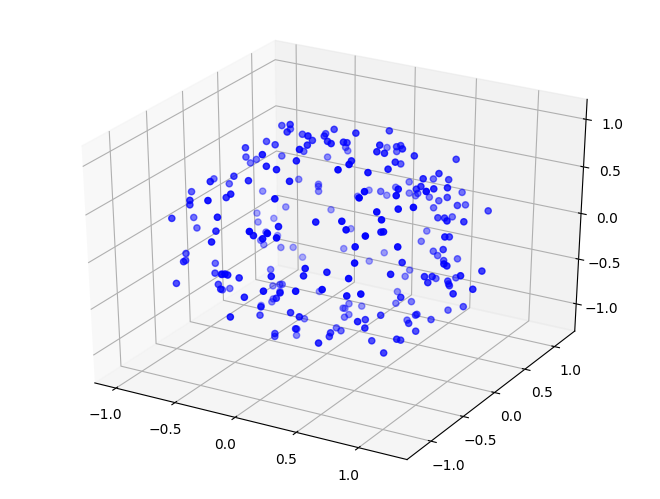

In [68]:
sphere = noisy_sample_spherical(250,3)
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(sphere[:,0],sphere[:,1],sphere[:,2], c='b', marker='o');
ax.set_aspect('equal');



Computation Time: 2.868384838104248 seconds


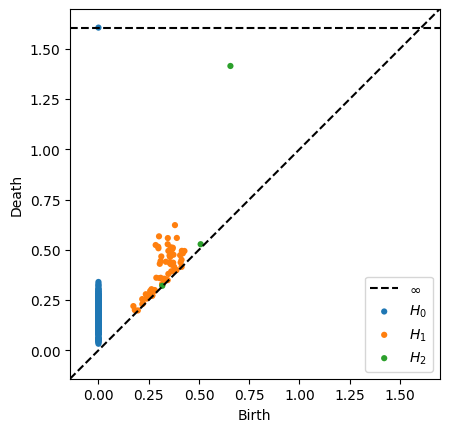

In [69]:
import time

start0 = time.time()
diagrams = ripser(sphere,maxdim=2)['dgms']
plot_diagrams(diagrams)
end0 = time.time()

print('Computation Time: ' + str(end0 - start0) + ' seconds')

TypeError: ripser() missing 1 required positional argument: 'X'